In [1]:
import pandas as pd

In [2]:
data=pd.read_csv("heart.csv")

In [3]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
target      0
dtype: int64

In [4]:
data_dup=data.duplicated().any()

In [5]:
data_dup

True

In [6]:
data=data.drop_duplicates()

In [7]:
data_dup=data.duplicated().any()

In [8]:
data_dup

False

In [9]:
cate_val=[]
cont_val=[]
for column in data.columns:
    if data[column].nunique()<=10:
        cate_val.append(column)
    else:
        cont_val.append(column)

In [10]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'target']

In [11]:
cont_val

['age', 'trestbps', 'chol', 'thalachh', 'oldpeak']

In [12]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'target']

In [13]:
data['cp'].unique()

array([3, 2, 1, 0], dtype=int64)

In [14]:
cate_val.remove('sex')
cate_val.remove('target')
data=pd.get_dummies(data,columns=cate_val,drop_first=True)

In [15]:
data.head()

,age,sex,trestbps,chol,thalachh,oldpeak,target,cp_1,cp_2,cp_3,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,63,1,145,233,150,2.3,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,37,1,130,250,187,3.5,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,41,0,130,204,172,1.4,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,56,1,120,236,178,0.8,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,57,0,120,354,163,0.6,1,0,0,0,...,1,0,1,0,0,0,0,0,1,0


In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
st=StandardScaler()
data[cont_val]=st.fit_transform(data[cont_val])

In [18]:
data.head()

,age,sex,trestbps,chol,thalachh,oldpeak,target,cp_1,cp_2,cp_3,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,0.949794,1,0.764066,-0.261285,0.018826,1.084022,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,-1.928548,1,-0.091401,0.067741,1.636979,2.118926,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,-1.485726,0,-0.091401,-0.822564,0.980971,0.307844,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0.174856,1,-0.661712,-0.203222,1.243374,-0.209608,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0.285561,0,-0.661712,2.080602,0.587366,-0.382092,1,0,0,0,...,1,0,1,0,0,0,0,0,1,0


In [19]:
X=data.drop('target',axis=1)

In [20]:
y=data['target']

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
log=LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [25]:
y_predl=log.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score

In [27]:
accuracy_score(y_test,y_predl)

0.9016393442622951

In [28]:
from sklearn import svm

In [29]:
svm=svm.SVC()

In [30]:
svm.fit(X_train,y_train)

SVC()

In [31]:
y_pred2=svm.predict(X_test)

In [32]:
accuracy_score(y_test,y_pred2)

0.8688524590163934

In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
knn=KNeighborsClassifier()

In [35]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [36]:
y_pred3=knn.predict(X_test)

In [37]:
accuracy_score(y_test,y_pred3)

0.8688524590163934

In [38]:
score=[]
for k in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    score.append(accuracy_score(y_test,y_pred))

In [40]:
import matplotlib.pyplot as plt

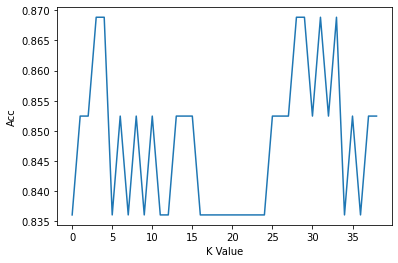

In [41]:
plt.plot(score)
plt.xlabel("K Value")
plt.ylabel("Acc")
plt.show()

In [42]:
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
accuracy_score(y_test,y_pred)

0.8524590163934426

In [44]:
data=pd.read_csv('heart.csv')

In [45]:
data=data.drop_duplicates()

In [47]:
X=data.drop('target',axis=1)
y=data['target']

In [48]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [49]:
from sklearn.tree import DecisionTreeClassifier

In [50]:
dt=DecisionTreeClassifier()

In [51]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [52]:
y_pred4=dt.predict(X_test)

In [53]:
accuracy_score(y_test,y_pred4)

0.7868852459016393

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
rf=RandomForestClassifier()

In [56]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [59]:
y_pred5=rf.predict(X_test)

In [60]:
accuracy_score(y_test,y_pred5)

0.8688524590163934

In [61]:
from sklearn.ensemble import GradientBoostingClassifier

In [62]:
gbc=GradientBoostingClassifier()

In [63]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [64]:
y_pred6=gbc.predict(X_test)

In [65]:
accuracy_score(y_test,y_pred6)

0.8524590163934426

In [67]:
final_data=pd.DataFrame({'Models':['LR','SVM','KNN','DT','RF','GB'],'ACC':[accuracy_score(y_test,y_predl)*100,accuracy_score(y_test,y_pred2)*100,accuracy_score(y_test,y_pred3)*100,accuracy_score(y_test,y_pred4)*100,accuracy_score(y_test,y_pred5)*100,accuracy_score(y_test,y_pred6)*100]})

In [68]:
final_data

,Models,ACC
0,LR,90.163934
1,SVM,86.885246
2,KNN,86.885246
3,DT,78.688525
4,RF,86.885246
5,GB,85.245902


In [69]:
import seaborn as sns

C:\Users\welcome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Models', ylabel='ACC'>

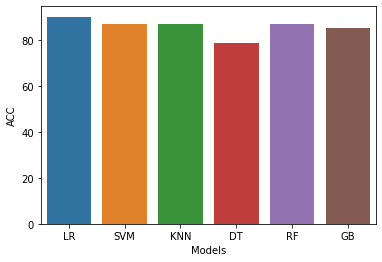

In [70]:
sns.barplot(final_data['Models'],final_data['ACC'])

In [87]:
X=data.drop('target',axis=1)
y=data['target']

In [88]:
from sklearn.linear_model import LogisticRegression

In [89]:
log=LogisticRegression()
log.fit(X_train,y_train)

C:\Users\welcome\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [90]:
import pandas as pd

In [99]:
new_data=pd.DataFrame(
{
    'age':52,
    'sex':1,
    'trestbps':125,
    'chol':212,
    'fbs':0,
    'restecg':1,
    'thalach':168,
    'exang':0,
    'oldpeak':1.0,
    'slope':2,
    'ca':2,
    'thal':3,
    'target':2
},index=[0])

In [100]:
new_data

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,125,212,0,1,168,0,1.0,2,2,3,2


In [101]:
p=rf.predict(new_data)
if p[0]==0:
    print("No Disease")
else:
    print("Disease")

No Disease


In [102]:
import joblib

In [103]:
joblib.dump(rf,'model_joblib_heart')

['model_joblib_heart']

In [104]:
model=joblib.load('model_joblib_heart')

In [105]:
model.predict(new_data)

array([0], dtype=int64)

In [1]:
from tkinter import *
import joblib
def show_entry_fields():
    p1=int(e1.get())
    p2=int(e2.get())
    p3=int(e3.get())
    p4=int(e4.get())
    p5=int(e5.get())
    p6=int(e6.get())
    p7=int(e7.get())
    p8=int(e8.get())
    p9=int(e9.get())
    p10=float(e10.get())
    p11=int(e11.get())
    p12=int(e12.get())
    p13=int(e13.get())
    model = joblib.load('model_joblib_heart')
    result=model.predict([[p1,p2,p3,p4,p5,p6,p7,p8,p8,p10,p11,p12,p13]])
    
    if result == 0:
        Label(master, text="No Heart Disease").grid(row=31)
    else:
        Label(master, text="Possibility of Heart Disease").grid(row=31)
    
    
master = Tk()
master.title("Heart Disease Prediction System")


label = Label(master, text = "Heart Disease Prediction System"
                          , bg = "black", fg = "white"). \
                               grid(row=0,columnspan=2)


Label(master, text="Enter Your Age").grid(row=1)
Label(master, text="Male Or Female [1/0]").grid(row=2)
Label(master, text="Enter Value of CP").grid(row=3)
Label(master, text="Enter Value of trestbps").grid(row=4)
Label(master, text="Enter Value of chol").grid(row=5)
Label(master, text="Enter Value of fbs").grid(row=6)
Label(master, text="Enter Value of restecg").grid(row=7)
Label(master, text="Enter Value of thalach").grid(row=8)
Label(master, text="Enter Value of exang").grid(row=9)
Label(master, text="Enter Value of oldpeak").grid(row=10)
Label(master, text="Enter Value of slope").grid(row=11)
Label(master, text="Enter Value of ca").grid(row=12)
Label(master, text="Enter Value of thal").grid(row=13)



e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)
e11 = Entry(master)
e12 = Entry(master)
e13 = Entry(master)

e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)
e8.grid(row=8, column=1)
e9.grid(row=9, column=1)
e10.grid(row=10, column=1)
e11.grid(row=11, column=1)
e12.grid(row=12, column=1)
e13.grid(row=13, column=1)



Button(master, text='Predict', command=show_entry_fields).grid()

mainloop()